In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def sigma(x):
    ex = np.exp(x)
    return ex / (1+ex)

def dsigma(x):
    s = sigma(x)
    return s * (1 - s)

In [8]:
X = np.linspace(-10, 10, 201)
S = sigma(X)
DS = dsigma(X)

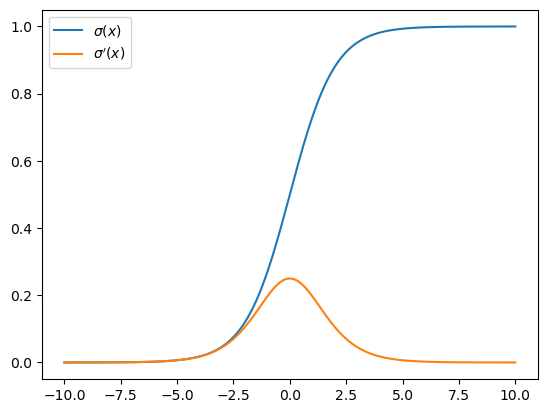

In [9]:
plt.plot(X, S, label=r"$\sigma(x)$")
plt.plot(X, DS, label=r"$\sigma'(x)$")
plt.legend()

In [32]:
X = np.array([1, 2, 3, 4, 5, 6, 7])
Y = np.array([0, 0, 0 ,1, 0, 1, 1])

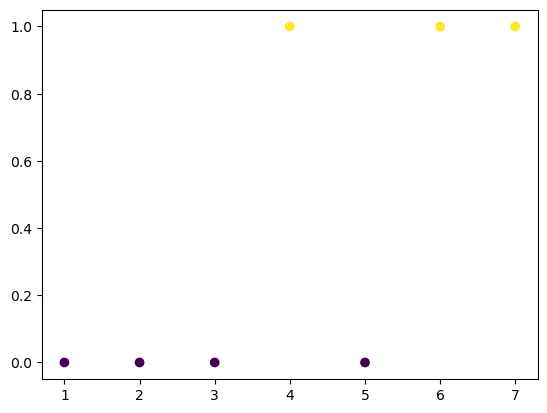

In [33]:
plt.scatter(X, Y, c=Y)

In [34]:
def predict(a, b, x):
    y_hat = sigma(a*x + b)
    return y_hat

In [35]:
def Loss(a, b, x, y):
    y_hat = predict(a, b, x)
    l = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
    return -l

In [36]:
Loss(a, b, X, Y)

array([0.04858735, 0.12692801, 0.31326169, 0.69314718, 1.31326169,
       0.12692801, 0.04858735])

In [37]:
def Loss_ab(a, b):
    return np.sum(Loss(a, b, X, Y))

Loss_ab = np.vectorize(Loss_ab)

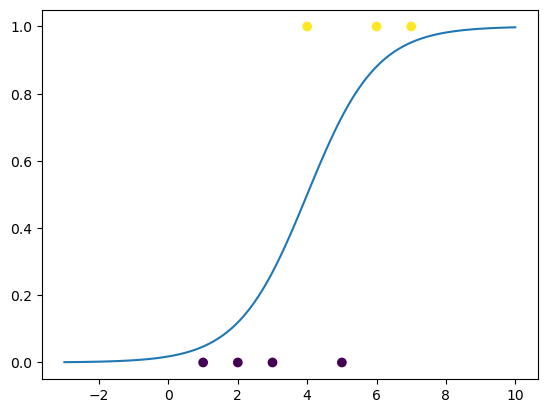

In [38]:
a = 1
b = -4
I = np.linspace(-3, 10, 101)
J = predict(a, b, I)

plt.scatter(X, Y, c=Y)
plt.plot(I, J)

In [44]:
A = np.linspace(-4, 6, 201)
B = np.linspace(-9, 1, 201)
AA, BB = np.meshgrid(A, B)

In [45]:
L = Loss_ab(AA, BB)

/tmp/ipykernel_51716/626896037.py:3: RuntimeWarning: divide by zero encountered in log
  l = y*np.log(y_hat) + (Integer(1)-y)*np.log(Integer(1)-y_hat)
/tmp/ipykernel_51716/626896037.py:3: RuntimeWarning: invalid value encountered in multiply
  l = y*np.log(y_hat) + (Integer(1)-y)*np.log(Integer(1)-y_hat)


In [46]:
L

array([[95.0000023 , 94.15000242, 93.30000255, ..., 32.10326382,
        32.59997816, 33.09729845],
       [94.85000242, 94.00000255, 93.15000268, ..., 32.25266374,
        32.74974003, 33.2474053 ],
       [94.70000254, 93.85000268, 93.00000282, ..., 32.40230121,
        32.89973337, 33.39773874],
       ...,
       [65.34490413, 64.49720105, 63.64961545, ...,         nan,
                nan,         nan],
       [65.1971549 , 64.34956435, 63.50209676, ...,         nan,
                nan,         nan],
       [65.04951583, 64.20204304, 63.35469894, ...,         nan,
                nan,         nan]])

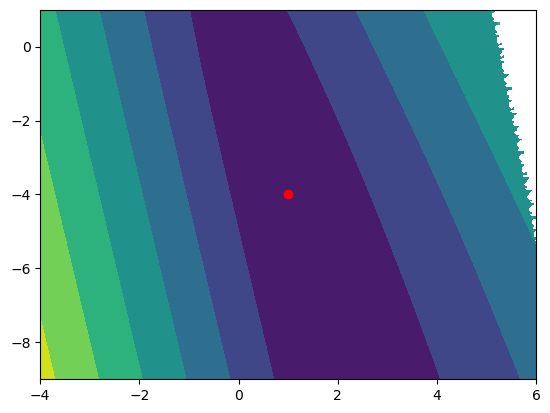

In [48]:
plt.contourf(AA, BB, L)
plt.plot(a, b, "o", color="red");

In [49]:
def Gradient(a, b, x, y):
    y_hat = predict(a, b, x)
    da = (y_hat - y)*x
    db = (y_hat - y)
    return da, db

def Total_Gradient(a, b, X, Y):
    DA, DB = Gradient(a, b, X, Y)
    return DA.sum(), DB.sum()

In [52]:
Total_Gradient(4, -4, X, Y)

(10.462996377679017, 3.481672181098773)

In [53]:
def gradient_descent(a0, b0, n, ratio):
    As = [a0]
    Bs = [b0]

    for i in range(n):
        a = As[-1]
        b = Bs[-1]
        da, db = Total_Gradient(a, b, X, Y)
        a_new = a - da * ratio
        b_new = b - db * ratio
        As.append(a_new)
        Bs.append(b_new)

    return As, Bs

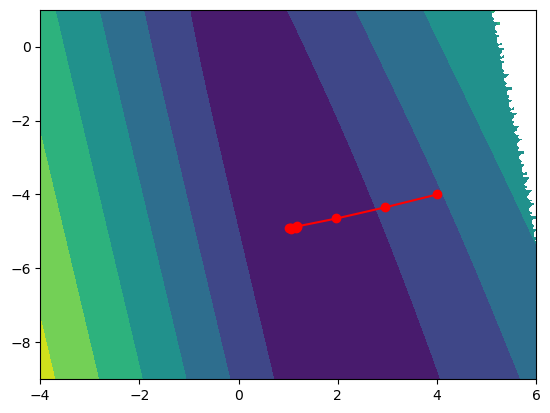

In [59]:
As, Bs = gradient_descent(4, -4, 10, 0.1)
plt.contourf(AA, BB, L)
plt.plot(As, Bs, "o-", color="red")


In [60]:
As[-1], Bs[-1]

(1.0579999277182468, -4.929012353452754)

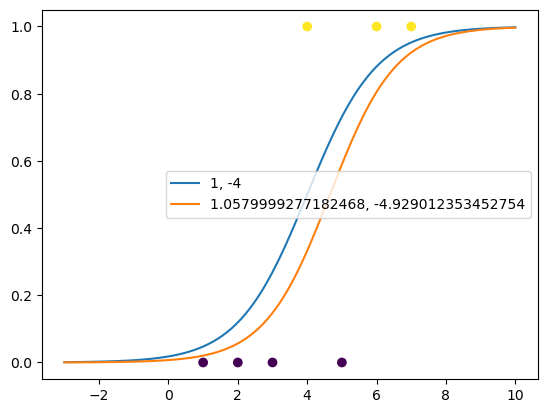

In [64]:
plt.scatter(X, Y, c=Y)

a = 1
b = -4
I = np.linspace(-3, 10, 101)
J = predict(a, b, I)
plt.plot(I, J, label="1, -4")

a = As[-1]
b = Bs[-1]
I = np.linspace(-3, 10, 101)
J = predict(a, b, I)
plt.plot(I, J, label="{}, {}".format(As[-1], Bs[-1]))
plt.legend();